In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns


class random_walk():
    '''
    The constructor has a parameter for the amount of time for each walk.
    '''
    def __init__(self, t):
        self.t = t
    
    '''
    This function simulates a random walk with a 1/3 probability for either going forward, backward, or 
    staying.  It returns the end position of the walk.
    '''
    def rls_walk(self): #rls = right left or stay
        x=0
        for i in range(self.t):
            step = random.randint(1,3) #1/3 chance of either 1,2, or 3
            if step == 1:
                x += 1 #move right

            elif step == 2:
                x -=1 #move left

            else:
                x += 0 #not moving
        return x
    
    '''
    Function that makes a list of all endpoints from 10000 simulated walks from rls_walk().  This data is reflected in the
    first PDF and CDF below.
    '''
    def rls_pdf(self): 
        return [self.rls_walk() for i in range(10000)] 
    
    '''
    Function simulates a random walk with a 1/2 probability for either going forward or 
    staying.  It returns the end position of the walk.
    '''
    def rs_walk(self): #rs = right or stay
        x=0
        for i in range(self.t):
            step = random.randint(1,2) #1/2 chance or either 1 or 2
            if step == 1:
                x += 1 #move right
            else:
                x += 0 #not moving
        return x
    
    '''
    Function that makes a list of all endpoints from 10000 simulated walks from rs_walk().  This data is reflected in the
    second PDF and CDF below.
    '''
    def rs_pdf(self):
        return [self.rs_walk() for i in range(10000)]
                

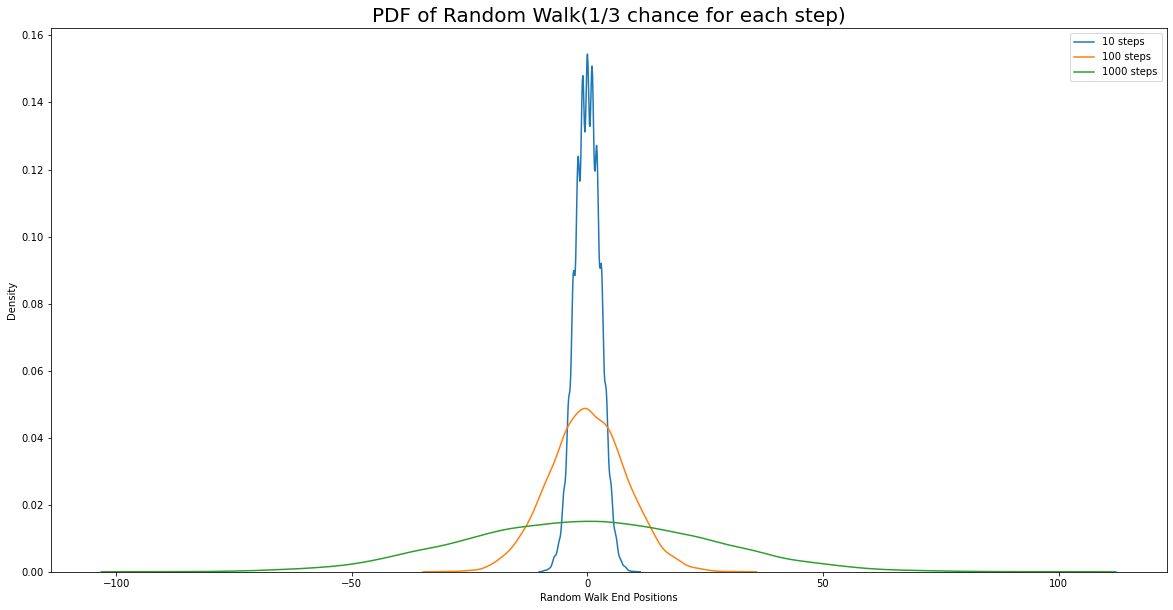

In [2]:
#calling class for 3 random walks
walk_10 = random_walk(10)
walk_100 = random_walk(100)
walk_1000 = random_walk(1000)

plt.figure(figsize=(20,10))

'''
Using kdeplot function from seaborn for distribution calling the rls_pdf function in the above class that generates list of 
endpoints for each walk
'''
sns.kdeplot(walk_10.rls_pdf(), label = '10 steps')
sns.kdeplot(walk_100.rls_pdf(), label='100 steps')
sns.kdeplot(walk_1000.rls_pdf(), label='1000 steps')
plt.legend()
plt.title('PDF of Random Walk(1/3 chance for each step)', fontsize = 20)
plt.xlabel('Random Walk End Positions')
plt.show()

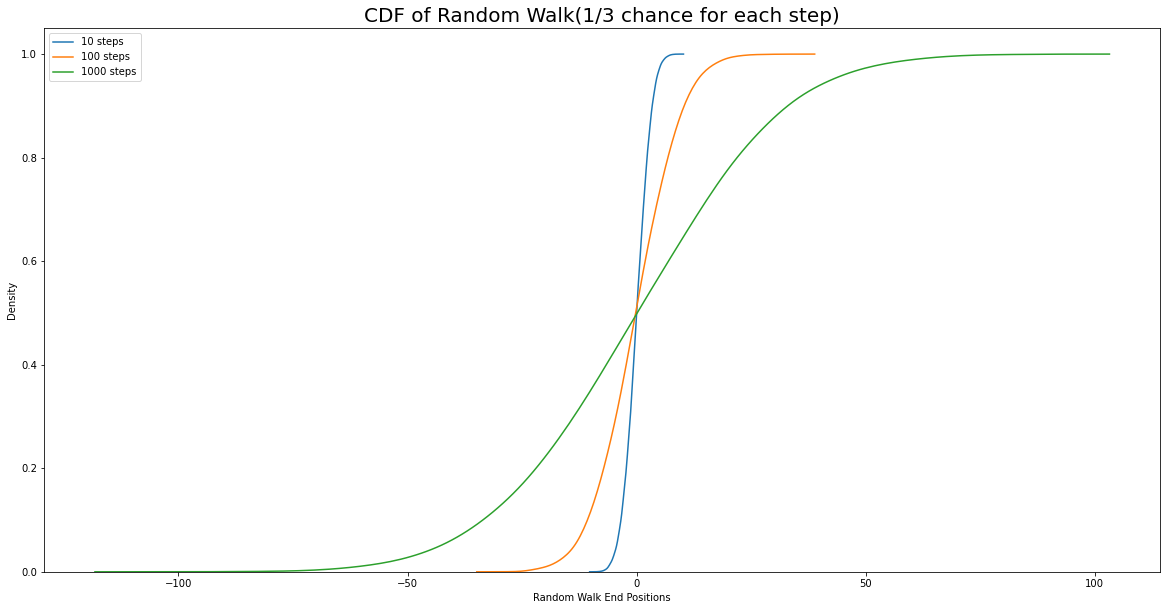

In [3]:
#CDF plots generated from cumulative argument. Same data used from the PDF above.
plt.figure(figsize=(20,10))

sns.kdeplot(walk_10.rls_pdf(), label = '10 steps', cumulative = True)
sns.kdeplot(walk_100.rls_pdf(), label='100 steps', cumulative = True)
sns.kdeplot(walk_1000.rls_pdf(), label='1000 steps', cumulative = True)
plt.legend()
plt.title('CDF of Random Walk(1/3 chance for each step)', fontsize = 20)
plt.xlabel('Random Walk End Positions')
plt.show()

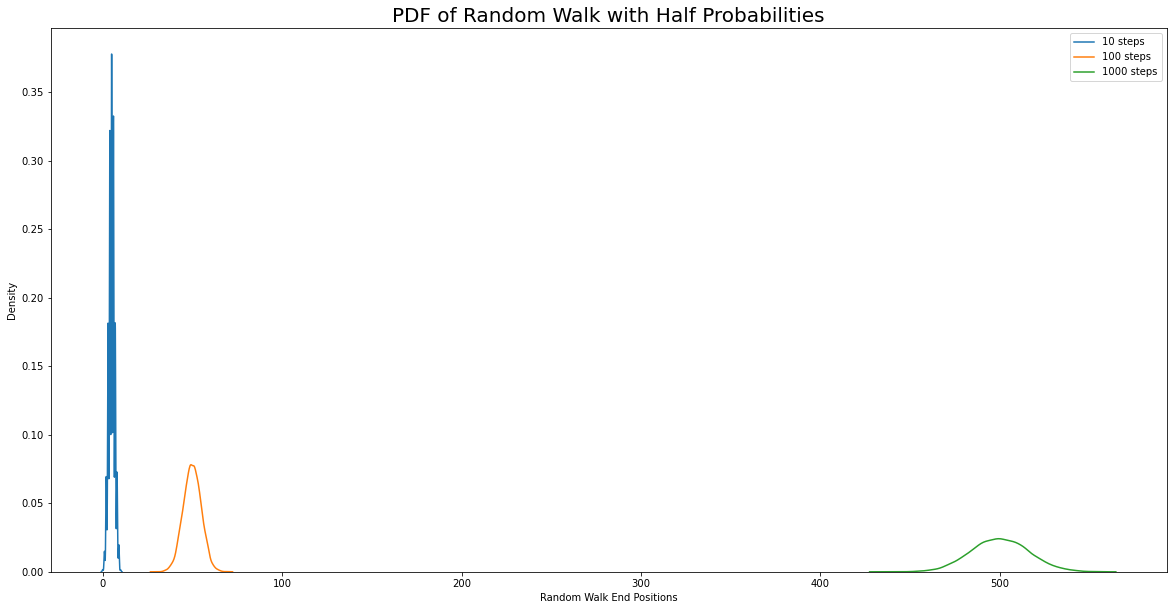

In [4]:
walk_rs_10 = random_walk(10)
walk_rs_100 = random_walk(100)
walk_rs_1000 = random_walk(1000)

'''
Calling the rs_pdf function in the above class that generates list of 
endpoints for each walk
'''
plt.figure(figsize=(20,10))
sns.kdeplot(walk_rs_10.rs_pdf(), label = '10 steps')
sns.kdeplot(walk_rs_100.rs_pdf(), label = '100 steps')
sns.kdeplot(walk_rs_1000.rs_pdf(), label = '1000 steps')
plt.legend()
plt.title('PDF of Random Walk with Half Probabilities', fontsize = 20)
plt.xlabel('Random Walk End Positions')
plt.show()

In [ ]:
#CDF plots generated from cumulative argument. Same data used from the PDF above.

plt.figure(figsize=(20,10))
sns.kdeplot(walk_rs_10.rs_pdf(), label = '10 steps', cumulative=True)
sns.kdeplot(walk_rs_100.rs_pdf(), label = '100 steps', cumulative=True)
sns.kdeplot(walk_rs_1000.rs_pdf(), label = '1000 steps', cumulative=True)
plt.legend()
plt.title('CDF of Random Walk with Half Probabilities', fontsize = 20)
plt.xlabel('Random Walk End Positions')
plt.show()


The plots for the different probabilities look different because the last two plots with 0 probability of stepping backwards will result in distributions past zero. The plots with 1/3 probability of going left, right, or staying can also end in a negative position, so those distributions are across negative values as well, and even centered around 0. For the last 2 plots, because those walk either go forward or stay for each step, the longer walks will have distribution centers that are farther ahead and not at the same centers as the shorter walks. The CDF curves don't touch each other at all.
